In [1]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing the dataset
dataset_train=pd.read_csv("Train_UWu5bXk.csv")
dataset_test=pd.read_csv("Test_u94Q5KV.csv")

# DATA PREPROCESSING

In [2]:
#Two different dataset are given for test and train. Therefore concatinating them for data preprocessing
dataset=pd.concat([dataset_train,dataset_test], axis=0,ignore_index=True) #axis=0 adds the other dataset to the bottem of other dataset

#Separating the dependent variable "y" from the dataset
x=dataset.iloc[:,dataset.columns!='Item_Outlet_Sales'] #iloc: integer location
y=dataset.loc[:,['Item_Outlet_Sales']] 
#import statistics
#statistics.mean(dataset['Item_Visibility'])

C:\Users\banak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [3]:
dataset.head()
#Item Identifier,Outlet_Identifier might be useless

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [4]:
#Data Exploration
dataset.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [5]:
dataset['Item_Visibility'].value_counts()
# There are a total of 879 items with item visibility = 0. 
# 2 possibilities: The item may not be present in that store (or) They are missing values. 
# 2 ways to settle this issue: Remove that item (or) replace with mean 

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [6]:
dataset.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.567574,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.567574,1.000000,-0.128625,0.014123,-0.049135
Item_Visibility,-0.006351,-0.128625,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.014123,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.049135,-0.083678,0.000645,1.000000


In [7]:
# Exploring each categorical variable
dataset['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [8]:
sum(dataset['Item_Fat_Content'].isnull())

0

In [9]:
#Replacing LF and low fat with Low Fat and reg with Regular
dataset['Item_Fat_Content']=dataset['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'])
dataset['Item_Fat_Content'].value_counts()
##########################################################################################################################
# 1st categorical variable is solved

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [10]:
print('number of missing values= %s'%(sum(dataset['Item_Type'].isnull())))
print('/n')
print(dataset['Item_Type'].value_counts())
##########################################################################################################################
#Nothing yet to solve for 2nd categorical variable.

number of missing values= 0
/n
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


In [11]:
print('number of missing values= %s'%(sum(dataset['Outlet_Location_Type'].isnull())))
print('/n')
dataset['Outlet_Location_Type'].value_counts() 
##########################################################################################################################
#Nothing yet to solve for 3rd categorical variable.

number of missing values= 0
/n


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [12]:
print('number of missing values= %s'%(sum(dataset['Outlet_Size'].isnull())))
print('/n')
dataset['Outlet_Size'].value_counts()

number of missing values= 4016
/n


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [13]:
#STEP-1
#Putting all null values separately
#Outlet_Size_Nulls=dataset.loc[dataset['Outlet_Size'].isnull()]
#STEP-2
#Putting all non-null values separately
#Outlet_Size_NotNulls=dataset.loc[dataset['Outlet_Size'].notnull()]
#STEP-3
#Outlet_Size_NotNulls.isnull().any()
#Item_Weight may not affect the Outlet_Size. Therefore dropping that column. 
#Outlet_Sales missing values are from test set. Therefore, removing that column too assuming that it have no affect on the Outlet_Size
#STEP-4
#Dropping the variables with missing values, which are assumed to have no effect on the Outlet_Size.
#Outlet_Size_NotNulls=Outlet_Size_NotNulls.drop(['Item_Weight'], axis=1)
#Outlet_Size_NotNulls=Outlet_Size_NotNulls.drop(['Item_Outlet_Sales'], axis=1)
# STEP-5 Creating matrix of variables
#Outlet_Size_NotNulls_x=Outlet_Size_NotNulls.loc[:,['Outlet_Location_Type','Outlet_Type']]
#Outlet_Size_NotNulls_y=Outlet_Size_NotNulls.loc[:,'Outlet_Size']
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_x=LabelEncoder()
#Outlet_Size_NotNulls_x['Outlet_Location_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Location_Type'])
#Outlet_Size_NotNulls_x['Outlet_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Type'])
#onehotencoder=OneHotEncoder()
#Outlet_Size_NotNulls_x=onehotencoder.fit_transform(Outlet_Size_NotNulls_x).toarray()
#labelencoder_y=LabelEncoder()
#Outlet_Size_NotNulls_y=labelencoder_y.fit_transform(Outlet_Size_NotNulls_y)
#from sklearn.model_selection import train_test_split
#Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_x_test,Outlet_Size_NotNulls_y_train,Outlet_Size_NotNulls_y_test=train_test_split(Outlet_Size_NotNulls_x,Outlet_Size_NotNulls_y,test_size=0.2,random_state=0)
# TRying KNN
#from sklearn.neighbors import KNeighborsClassifier
#KNNclassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#KNNclassifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#KNN_y_pred=KNNclassifier.predict(Outlet_Size_NotNulls_x_test)
#from sklearn.metrics import confusion_matrix
#Kcm=confusion_matrix(Outlet_Size_NotNulls_y_test, KNN_y_pred)
#Trying SVM
#from sklearn.svm import SVC
#SVMclassifier=SVC(kernel='rbf', random_state=0)
#SVMclassifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#SVM_y_pred=SVMclassifier.predict(Outlet_Size_NotNulls_x_test)
#SVM_cm=confusion_matrix(Outlet_Size_NotNulls_y_test, SVM_y_pred)
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression(random_state=0)
#classifier.fit(Outlet_Size_NotNulls_x_train,Outlet_Size_NotNulls_y_train)
#y_pred=classifier.predict(Outlet_Size_NotNulls_x_test)
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(Outlet_Size_NotNulls_y_test, y_pred)
#labelencoder_y.inverse_transform(y_pred)
####################################################################################################
#dataset1=dataset.loc[dataset['Outlet_Size'].notnull()]
#all_cols= dataset.loc[:,['Outlet_Location_Type','Outlet_Type','Outlet_Size']]

#x_trn = dataset1.loc[:,['Outlet_Location_Type','Outlet_Type']]
#y_trn=dataset1['Outlet_Size']

#dataset2=dataset.loc[dataset['Outlet_Size'].isnull()]
#x_tst = dataset2.loc[:,['Outlet_Location_Type','Outlet_Type']]
#y_tst=dataset2['Outlet_Size']

In [14]:
#####---------WORKED------------######

# Filling the missing values in 'Outlet_Size' with the predicted values 
#Step-1: select only those variables that are assumed to have affect on 'Outlet_Size' prediction.
#Step-2: do OHE for the selected variables 
dummy =pd.concat([pd.get_dummies(dataset[['Outlet_Location_Type','Outlet_Type','Outlet_Identifier']]), dataset[['Item_Visibility']]], axis=1)
# Concatinating the 'Outlet_Size' to the selected variables dataset (dummy)
dummy=pd.concat([dummy,dataset['Outlet_Size']], axis=1)

In [15]:
#checking the datatypes of each variable after OHE
dummy.dtypes

Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Outlet_Identifier_OUT010           uint8
Outlet_Identifier_OUT013           uint8
Outlet_Identifier_OUT017           uint8
Outlet_Identifier_OUT018           uint8
Outlet_Identifier_OUT019           uint8
Outlet_Identifier_OUT027           uint8
Outlet_Identifier_OUT035           uint8
Outlet_Identifier_OUT045           uint8
Outlet_Identifier_OUT046           uint8
Outlet_Identifier_OUT049           uint8
Item_Visibility                  float64
Outlet_Size                       object
dtype: object

In [16]:
# Step-3: separating the rows with 'NaN' values into two defferent datasets (NO_NAN and NAN) 
#from sklearn.preprocessing import LabelEncoder
# Dataset without NaN values.
NO_NAN = dummy.loc[dummy['Outlet_Size'].notnull()]
Input=NO_NAN.iloc[:,:-1]
Output=NO_NAN.iloc[:,-1]
#Output=pd.get_dummies(Output)

#labelencoder_x=LabelEncoder()
#Output=labelencoder_x.fit_transform(Output)

# Dataset with NaN values.
NAN =  dummy.loc[dummy['Outlet_Size'].isnull()]
ip = NAN.iloc[:,:-1]
op = NAN.iloc[:,-1]
#labelencoder_y=LabelEncoder()
#op=labelencoder_y.fit_transform(op)

# Step-4: seperating the NO_NAN dataset into train and test for testing if the predictions are correct or not
from sklearn.model_selection import train_test_split
Input_train,Input_test,Output_train,Output_test=train_test_split(Input,Output,test_size=0.2,random_state=0)



In [17]:
# Trying KNN
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNNclassifier.fit(Input_train,Output_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
# Predicted values of NO_NAN test set
KNN_y_pred=KNNclassifier.predict(Input_test)

In [19]:
# Unique values in prediction of test set
np.unique(KNN_y_pred)

array(['High', 'Medium', 'Small'], dtype=object)

In [20]:
# Unique values for the predictions of null values
np.unique(KNNclassifier.predict(ip))

array(['High', 'Medium', 'Small'], dtype=object)

In [21]:
# Confusion matrix to check the predictions for NO_NAN test set
from sklearn.metrics import confusion_matrix
Kcm=confusion_matrix(Output_test, KNN_y_pred)

In [22]:
Kcm

array([[280,   0,   0],
       [  0, 951,   0],
       [  0,   0, 807]], dtype=int64)

In [23]:
#For Train
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_1=LabelEncoder()
#labelencoder_2=LabelEncoder()
#dataset['Outlet_Location_Type']=labelencoder_1.fit_transform(dataset['Outlet_Location_Type'])
#dataset['Outlet_Type']=labelencoder_2.fit_transform(dataset['Outlet_Type'])
#onehotencoder_1=OneHotEncoder(categorical_features='all')
#dataset=onehotencoder_1.fit_transform(dataset).toarray()
#For Train
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_1=LabelEncoder()
#labelencoder_2=LabelEncoder()
#x_trn['Outlet_Location_Type']=labelencoder_1.fit_transform(x_trn['Outlet_Location_Type'])
#x_trn['Outlet_Type']=labelencoder_2.fit_transform(x_trn['Outlet_Type'])
#onehotencoder_1=OneHotEncoder(categorical_features='all')
#x_trn=onehotencoder_1.fit_transform(x_trn).toarray()
#labelencoder_3=LabelEncoder()
#y_trn=labelencoder_3.fit_transform(y_trn)
#x_trn=x_trn[:,1:] # Removing 1st column fot dummy variable trap
#For Test (NUll Values)
#labelencoder_4=LabelEncoder()
#labelencoder_5=LabelEncoder()
#x_tst['Outlet_Location_Type']=labelencoder_4.fit_transform(x_tst['Outlet_Location_Type'])
#x_tst['Outlet_Type']=labelencoder_5.fit_transform(x_tst['Outlet_Type'])

#onehotencoder_2=OneHotEncoder(categorical_features='all')
#x_tst=onehotencoder_2.fit_transform(x_tst).toarray()

#x_tst=x_tst[:,1:] 

In [24]:
dataset['Outlet_Size'][1]

'Medium'

In [25]:
#It did not work: Have to check the problem later.
#dataset['Outlet_Size'].fillna(0, inplace=True)
#for i in range(0,len(dataset)):
    #if dataset['Outlet_Size'][i]==0:
        
        #dataset['Outlet_Size'][i]=dataset['Outlet_Size'][i].replace(0, KNNclassifier.predict(dataset['Outlet_Size'][i]))

In [31]:
#FILLING THE NANs WITH THE PREDICTIONS.
#Putting all the predicted values for NaNs in a separate variable 'filler'
filler=KNNclassifier.predict(ip)

In [32]:
#Converting the array to a list 
filler=filler.tolist() # Converting an array into list 

In [33]:
# Frequency of each value in a list 
import collections
counter=collections.Counter(filler)
print(counter)

Counter({'Small': 3264, 'Medium': 495, 'High': 257})


In [34]:
len(filler)

4016

In [35]:
#To make sure that the number of predicted values for nulls and # of nulls are equal.
sum(dataset['Outlet_Size'].isnull())

4016

In [36]:
# FIlling all the NaN values with the predicted values.
dataset.loc[dataset.Outlet_Size.isnull(), 'Outlet_Size'] = filler

In [37]:
#Replacing the missing values with mode. 
#import statistics
#dataset['Outlet_Size']=dataset['Outlet_Size'].fillna(statistics.mode(dataset['Outlet_Size']))
##################### 4th categorical variable si kind of solved 

In [38]:
dataset['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [39]:
# Total number of missing values in each feature
sum(dataset['Outlet_Type'].isnull())

0

In [41]:
#NUll value check 
sum(dataset['Item_MRP'].isnull())

0

In [42]:
#Outlier check
import seaborn as sns

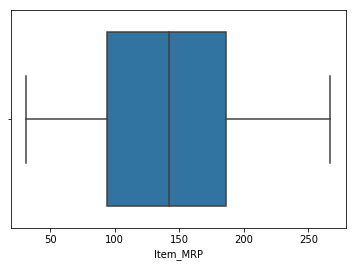

In [43]:
sns.boxplot(dataset['Item_MRP'])

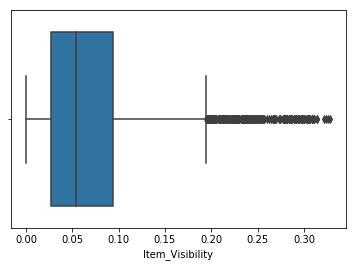

In [44]:
sns.boxplot(dataset['Item_Visibility'])

In [43]:
#Replacing the 0 visibity with the mean visibility
import statistics
statistics.mean(dataset['Item_Visibility'])
dataset['Item_Visibility']=dataset['Item_Visibility'].replace(0,0.06595278007399324)

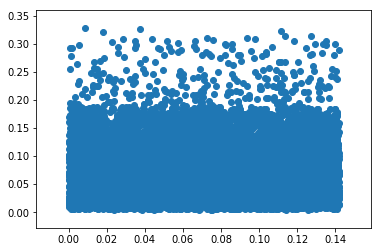

In [44]:
plt.scatter(l,dataset['Item_Visibility'])

In [45]:
max(dataset['Item_Visibility'])

0.328390948

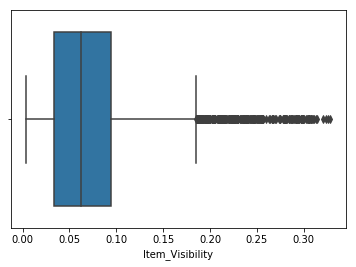

In [46]:
sns.boxplot(dataset['Item_Visibility'])

In [49]:
# null value check
sum(dataset['Item_Weight'].isnull())

2439

In [50]:
dataset.head(1)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.138,Dairy,0.016047,9.3,1999,OUT049,Tier 1,Medium,Supermarket Type1


In [51]:
# NOw let us consider, Item_Fat_Content,Item_Identifier,Item_Type as the input variables
# Item_Weight is the output variable
# Step-1: take all iputs in 1 variableand output in other variable.
# Step-2: label encode Item_Fat_Content
# Step-3: OHE Item_Identifier and Item_Type


In [52]:
dataset['Item_Identifier'].value_counts()

FDZ33    10
FDN38    10
FDA43    10
NCQ29    10
DRF15    10
NCL17    10
FDW19    10
DRK49    10
NCH30    10
FDX31    10
FDF41    10
NCF18    10
FDZ44    10
DRL49    10
FDU13    10
NCU29    10
FDF21    10
FDV12    10
FDK56    10
FDV20    10
FDB38    10
FDP25    10
FDS25    10
FDS03    10
FDD14    10
FDA07    10
NCI06    10
FDD16    10
FDM60    10
NCM43    10
         ..
NCG19     8
FDA51     8
FDD44     8
FDB56     8
FDR55     8
FDC29     8
FDX11     8
FDE57     8
FDQ44     8
NCY05     8
FDB16     8
FDF53     8
FDF45     8
FDY11     8
FDS07     8
FDU10     8
FDI02     8
FDH58     7
FDR51     7
FDO33     7
FDX49     7
FDM52     7
FDI46     7
FDS22     7
FDM10     7
NCL42     7
DRN11     7
NCW54     7
FDL50     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [53]:
#Step-1
IFC=dataset['Item_Fat_Content']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_1=LabelEncoder()
IFC=labelencoder_1.fit_transform(IFC)
IFC=labelencoder_1.fit_transform(IFC)

Item_Identifier and Item_Type

In [55]:
II =pd.get_dummies(dataset[['Item_Identifier']])


In [59]:
from sklearn.decomposition import PCA
pca_1=PCA(n_components= None)
II=pca_1.fit_transform(II)
explained_variance=pca_1.explained_variance_ratio_

In [63]:
explained_variance.value_counts

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
# Step-2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_1=LabelEncoder()
Outlet_Size_NotNulls_x['Outlet_Location_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Location_Type'])
Outlet_Size_NotNulls_x['Outlet_Type']=labelencoder_x.fit_transform(Outlet_Size_NotNulls_x['Outlet_Type'])

In [ ]:
python outlier detection library
gives % of outliers and inliers.
statquest-youtube
adjusted r2 for multiple features.
Medium: platform posts on DL and ML : theoritical explanation
combination charts: 1 x and 2 y axis